# NZ birds from scratch

no looking patrick...

### imports + settings etc

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

## get data

In [1926]:
path = Path('/home/ubuntu/data/fastai/data/birds'); path.ls()

[PosixPath('/home/ubuntu/data/fastai/data/birds/kereru'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_kereru.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/tui'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/takahe'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/kiwi'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/kea'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/kakapo'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_kea.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_tui.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/waxeye'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_weka.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_kakapo.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/weka'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_kiwi.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_waxeye.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/birds/urls_takahe.csv')]

In [1928]:
df = pd.read_csv(path/'urls_kereru.csv', delimiter='\n', header=None); df.tail(2)

0
98  https://www.tvnz.co.nz/content/dam/images/news...
99  https://www.racingnews.co.nz/images/blog/e9066...

In [1929]:
classes = ['kereru', 'kea', 'tui', 'weka', 'kakapo', 'kiwi', 'waxeye', 'takahe']; 

In [1930]:
# doc(verify_images)

In [1931]:
for bird in classes:
    dest = path/bird
    url_csv_path = path/f"""urls_{bird}.csv"""
#     dest.mkdir(parents=True, exist_ok=True)
#     print('downloading ', bird)
#     download_images(url_csv_path, dest)
    print(len(dest.ls()), ' ', bird, ' images')
#     verify_images(dest, delete=True, max_size=500)
#     print(len(dest.ls()), ' ', bird, ' verified images')

62   kereru  images
126   kea  images
44   tui  images
62   weka  images
65   kakapo  images
76   kiwi  images
97   waxeye  images
66   takahe  images


In [1932]:
bs = 64

In [1933]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [1935]:
# doc(ImageDataBunch.from_folder)

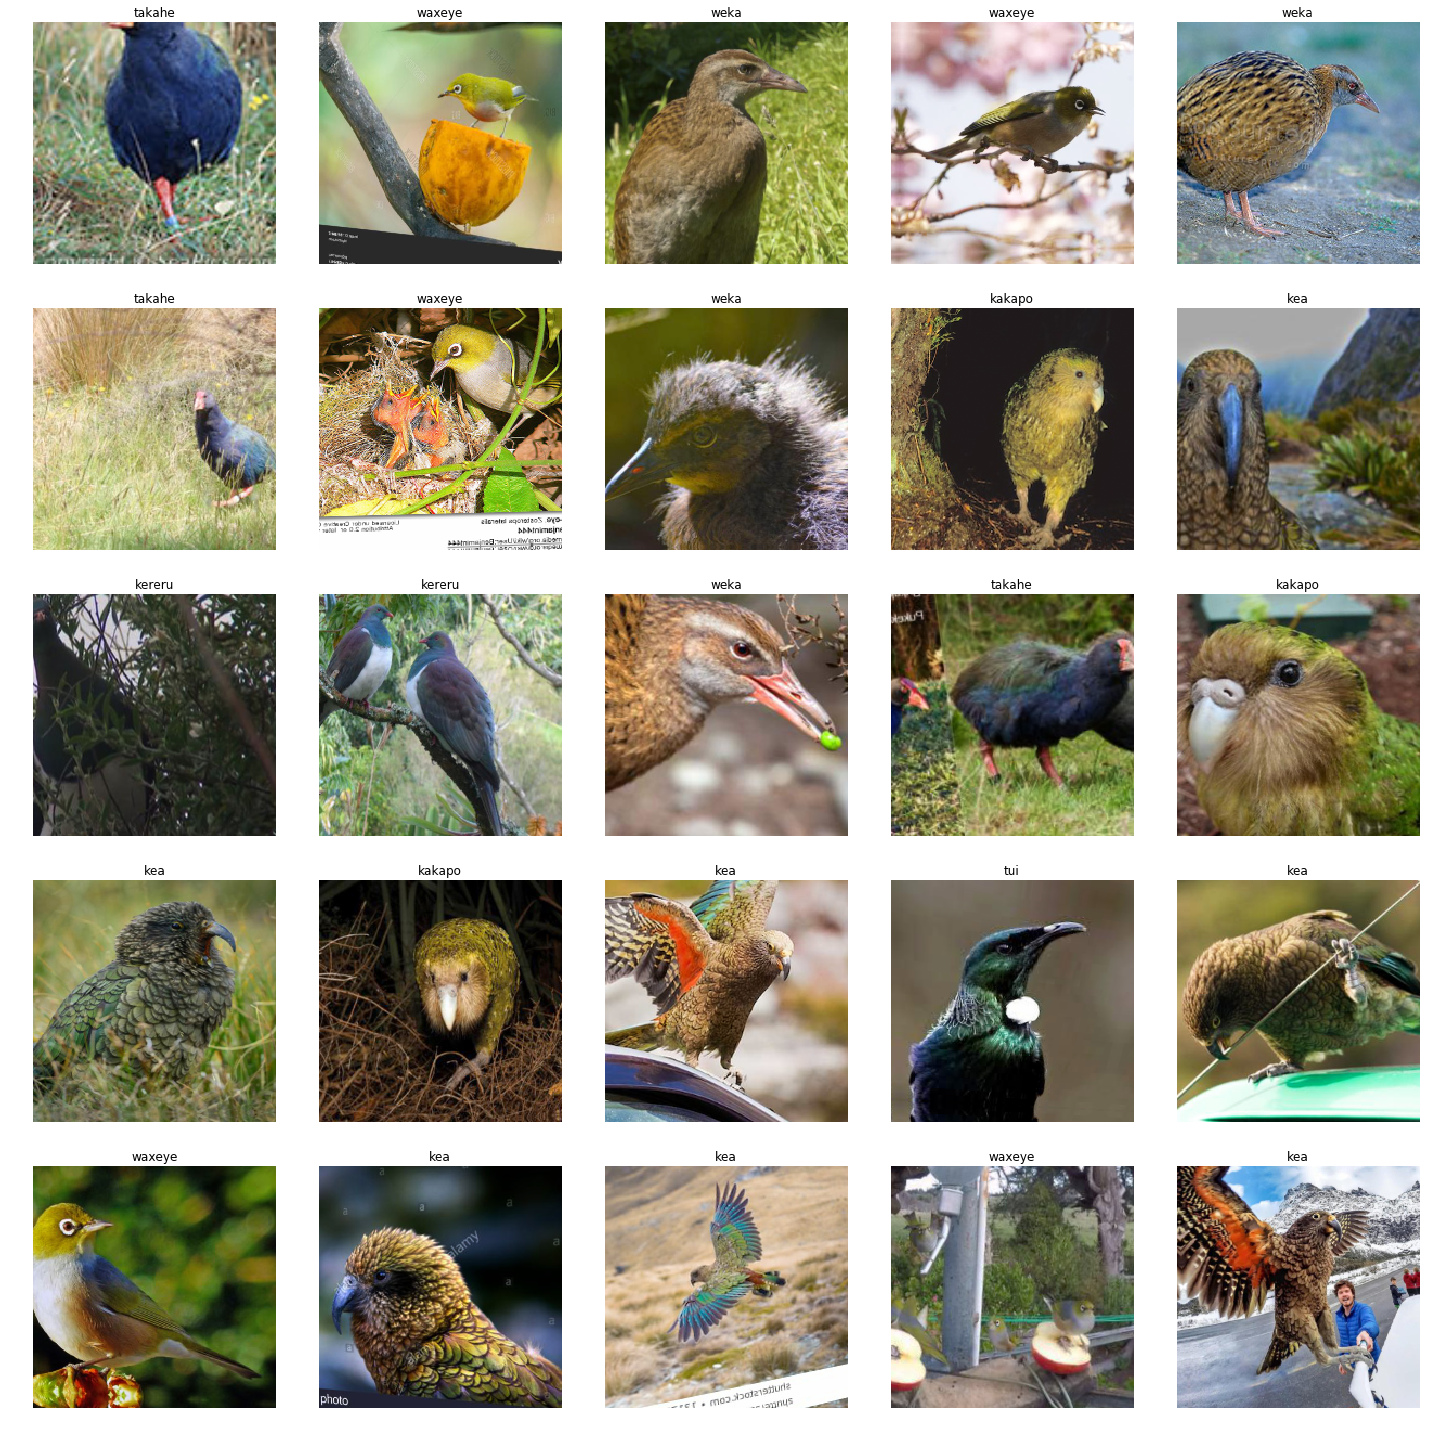

In [1936]:
data.show_batch()

### NZ bird species

['kereru', 'kea', 'tui', 'weka', 'kakapo', 'kiwi', 'waxeye', 'takahe']

## Clean data

In [35]:
classes

['kereru', 'kea', 'tui', 'weka', 'kakapo', 'kiwi', 'waxeye', 'takahe']

In [1768]:
current_bird = path/'takahe'
current_bird_img_list = current_bird.ls()

In [1918]:
# checking_img = current_bird_img_list.pop(); print(checking_img, len(current_bird_img_list))

In [1917]:
# open_image(checking_img)

In [1915]:
# !rm {checking_img}

## examine data

## Create Learner

In [1945]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [1946]:
learn.fit_one_cycle(6)

In [1947]:
learn.save('nz_birds_1')

## Unfreeze and Fine Tune model

In [1953]:
learn.unfreeze()

In [1954]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


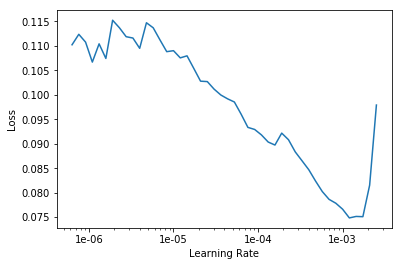

In [1955]:
learn.recorder.plot()

In [1956]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

In [1971]:
learn.save('nz_birds_2')

## Interpretation

In [1957]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

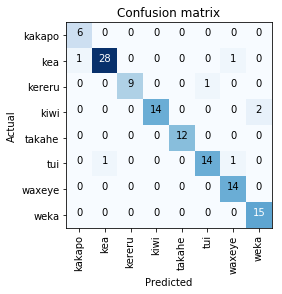

In [1958]:
interp.plot_confusion_matrix()

In [1965]:
interp.most_confused(min_val=2)

[]

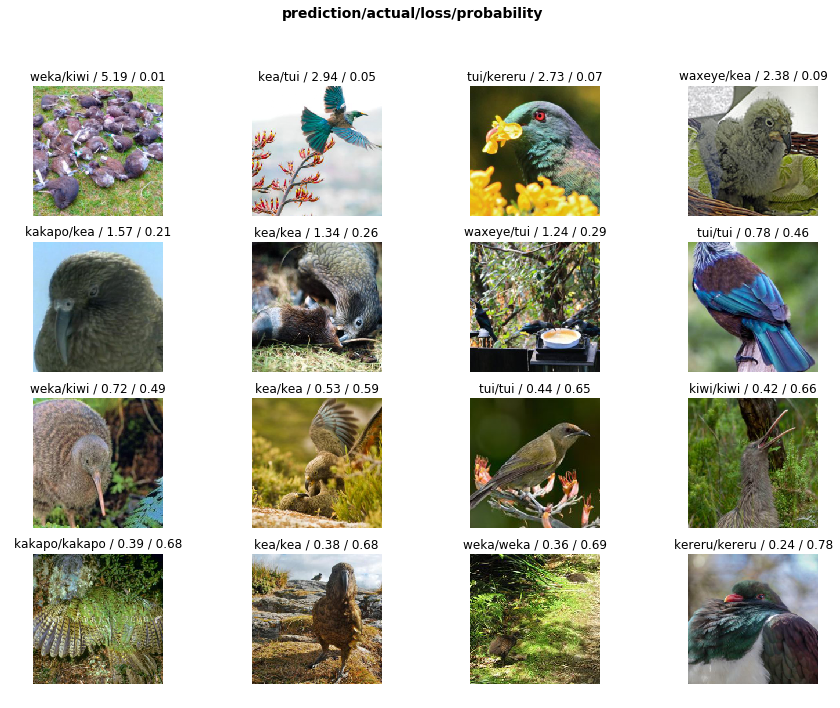

In [1968]:
interp.plot_top_losses(16, figsize=(15,11))

## RESNET50

In [1970]:
data50 = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), 
                                  size=299, num_workers=4).normalize(imagenet_stats)

In [1972]:
learn50 = create_cnn(data50, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:24<00:00, 4226054.95it/s]


In [1973]:
learn50.fit_one_cycle(4)

In [1974]:
learn50.save('nz_birds_50_1')

In [1975]:
learn50.unfreeze()

In [1976]:
learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


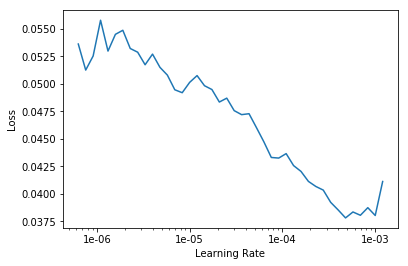

In [1978]:
learn50.recorder.plot()

In [1979]:
learn50.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

In [1980]:
interp = ClassificationInterpretation.from_learner(learn50)

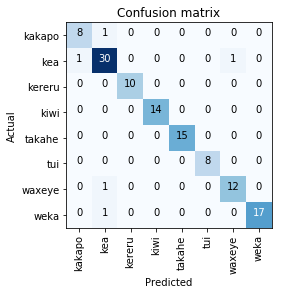

In [1982]:
interp.plot_confusion_matrix()

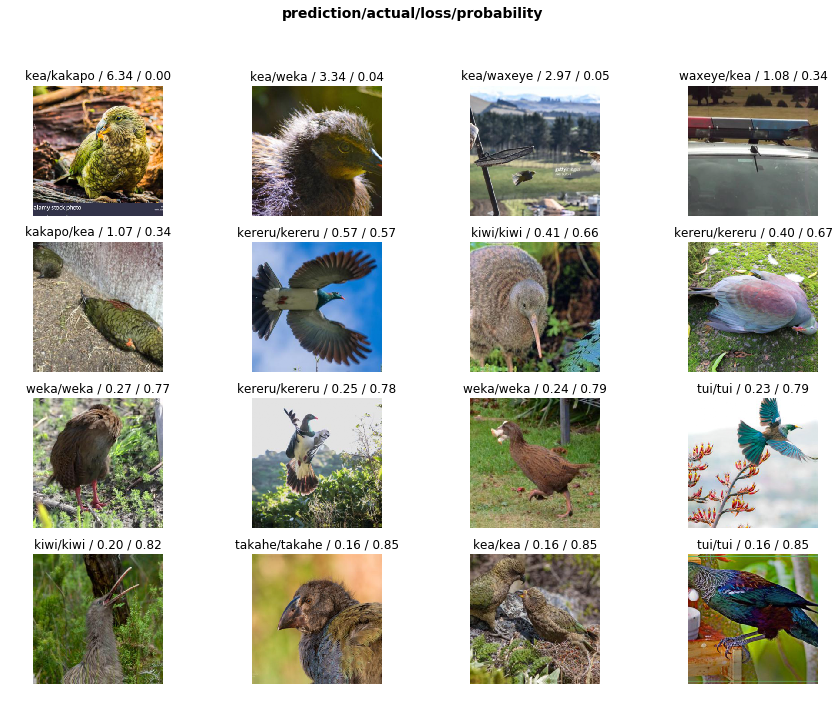

In [1987]:
interp.plot_top_losses(16, figsize=(15,11))